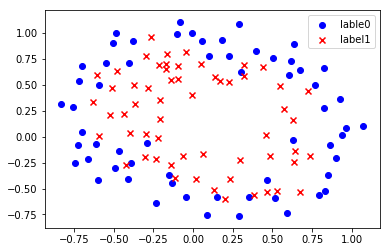

In [2]:
import numpy as np
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

# 数据是否需要标准化
scale = False

#载入数据
data = np.genfromtxt('LR-testSet2.txt', delimiter=',')
x_data = data[:, :-1]
y_data = data[:, -1, np.newaxis]

def plot():
    x0 = []
    x1 = []
    y0 = []
    y1 = []
    
    for i in range(len(x_data)):
        if y_data[i] == 0:
            x0.append(x_data[i, 0])
            y0.append(x_data[i, 1])
        else:
            x1.append(x_data[i,0])
            y1.append(x_data[i, 1])
        
    # 画图
    scatter0 = plt.scatter(x0, y0, c='b', marker='o')
    scatter1 = plt.scatter(x1, y1, c='r', marker='x')
    
    # 画图例
    plt.legend(handles=[scatter0, scatter1], labels=['lable0', 'label1'], loc='best')
    
plot()
plt.show()


In [ ]:
# 定义多项式回归， degree 的值可以调节多项式的特征
poly_reg = PolynomialFeatures(degree=3)
# 特征处理
x_poly = poly_reg.fit_transform(x_data)



In [ ]:
def sigmoid(x):
    return 1.0/(1+np.exp(-x))

def cost(xMat, yMat, ws):
    left = np.multiply(yMat, np.log(sigmoid(xMat*ws)))
    right = np.multiply(1-yMat, np.log(1-sigmoid(xMat*ws)))
    return np.sum(left+right) / -len(xMat)


def gradAscent(xArr, yArr):
    
    if scale == True:
        xArr = preprocessing.scale(xArr)
        
    xMat = np.mat(xArr)
    yMat = np.mat(yArr)
    
    lr = 0.03
    epoches = 50000
    costList = []
    # 计算数据列数， 有几列就有几个权值
    # 初始化权值
    ws = np.mat(np.ones((n,1)))
    
    for i in range(epoches+1):
        # xmat 和weight 矩阵相乘
        h = sigmoid(xMat*ws)
        # 计算误差
        ws_grad = xMat.T*(h - yMat) /m
        ws = ws - lr*ws_grad
        
        if i % 50 == 0:
            costList.append(cost(xMat, yMat, ws))
            
    return ws, costList
    

In [ ]:
ws, costList = gradAscent(X_data, y_data)
print(ws)


# 预测
def predict(x_data, ws):
    xMat = np.mat(x_data)
    ws = np.mat(ws)
    return [1 if x >= 0.5 else 0 for x in sigmoid(xMat*ws)]

predictions = predict(x_poly, ws)
print(classification_report(y_data, predictions))